# Simple Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn library: Tools for machine learning and statistical modeling (https://scikit-learn.org/stable/)
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score

# Statsmodels: Tools for estimation of statistical models, statistical test and data exploration (http://www.statsmodels.org/)
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
#download at http://www-bcf.usc.edu/~gareth/ISL/data.html
#read in data (change to what ever folder you use)

advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
advertising.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


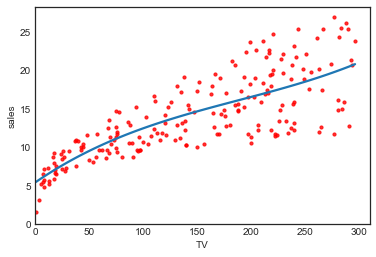

In [4]:
# we can display the regression line using seaborn
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# advertising.TV is the predictor (X)
# advertising.sales is the response (Y)
# order = 1 for linear regression, order > 1 for polynomial regression (relationship that doesn't look linear)
# ci = size of the confidence interval for the regression estimate (1-100)
# scatter_kws: a dictionary to define the color and marker size for plot elements

sns.regplot(advertising.TV, advertising.sales, order=3, ci=None, scatter_kws={'color':'r', 's':10})
plt.xlim(0, 310)
plt.ylim(ymin=0);

There are multiple ways to do linear regression in Python. Above we have used seaborn to just draw the regression line. We can also use Scikit-Learn or the statsmodels library. First we use the sklearn module. The intercept is $\beta_0$ and the coefficent is $\beta_1$


In [5]:
# Regression coefficients (Ordinary Least Squares)

# define the sklearn.linear_model.LinearRegression function as lm
# LinearRegression fits a linear model with coefficients b = (b1, b2, …, bp) 
## to minimize the residual sum of squares between the observed targets in the dataset, 
## and the targets predicted by the linear approximation

lm = skl_lm.LinearRegression()

# X is the predictor
# Y is the response

X = advertising.TV.values.reshape(-1,1)
Y = advertising.sales

# Use the fit(X, Y) method to fit a linear model 

lm.fit(X,Y)
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


Text(0, 0.5, 'Sales')

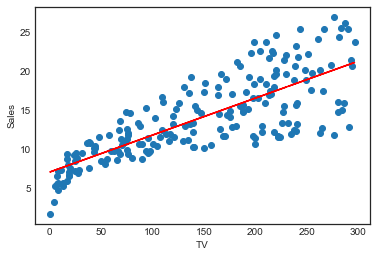

In [6]:
beta_0 = lm.intercept_
beta_1 = lm.coef_
plt.scatter(X, Y)
plt.plot(X, beta_1*X + beta_0, 'r')
plt.xlabel("TV")
plt.ylabel("Sales")

What is the predictor and the response in the code above?

In [7]:
# Use statsmodel for linear regression

# Use statsmodels.formula.api.ols(formula, data) to create a model from a formula and dataframe
# and fit() the model
# summary() return regression results in three separate tables (tables[1] returns the second table)

# The formula: 'sales ~ TV', to predict sales using TV
# The dataframe: advertising

est = smf.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

# R-squared: close to 1 means a large proportion of the variability in the response has been explained by the regression
# R-squared: close to 0 means the regression did not explain much of the variability in the response
# F-statistic: close to 1 means no relationship between the response and predictor
# Choose models with lower AIC and BIC values

# H0: beta_1 = 0
# HA: beta_1 not equal to 0
# t-statistic measures the number of SDs that beta_1 away from 0
# small p-value: reject H0, there is a a substantial association between X (predictor) and Y (response)

# Statistis in Table 3 are different tests use to indicate the skewness and kurtosis of distribution

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


### <p style="color:red;">Task 5 (Question 1): 1%</p>

1. Perform the same simple regression on radio and newspaper (using statsmodels)

In [10]:
mod = smf.ols("sales ~ radio", advertising).fit()
print("Radio as predictor\n", mod.summary().tables[0])

mod = smf.ols("sales ~ newspaper", advertising).fit()
print("Newspaper as predictor\n", mod.summary().tables[0])

Radio as predictor
                             OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           4.35e-19
Time:                        13:53:21   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
Newspaper as predictor
                             OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:  

In [5]:
mod = smf.ols("sales ~ radio", advertising).fit()
print(mod.summary().tables[1])
mod = smf.ols("sales ~ newspaper", advertising).fit()
print(mod.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


2. Explain the t-statistic significance

# Multiple Regression

Perform multiple regression on TV, radio and newspaper, use:
```
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()
```
Also print the correlation:
```
advertising.corr()
```

In [15]:
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.58e-96
Time:                        14:03:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# corr(): To compute pairwise correlation of columns

advertising.corr(method='pearson')

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


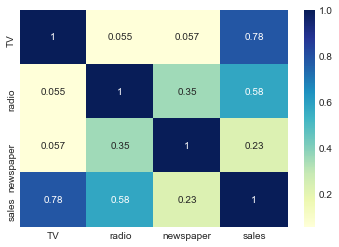

In [7]:
corrMatrix = advertising.corr()
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
plt.show()

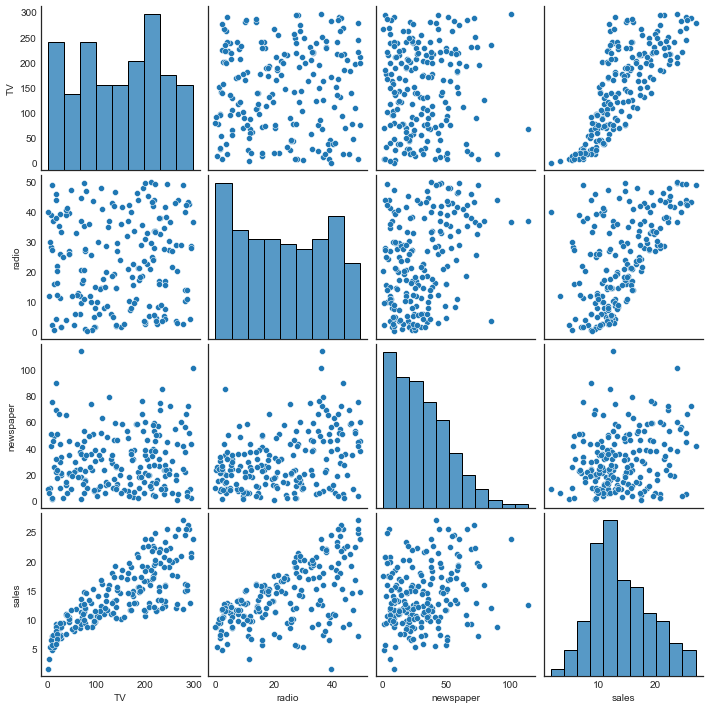

In [8]:
sns.pairplot(advertising)

### <p style="color:red;">Task 5 (Question 2): 1%</p>

1. Which predictor(s) has significant association with sales? Which does not?

Ans: The predictor Tv has significant association with sales and the predictor newspaper does not have significant association with sales

2. Did you have a different answer when performing individual simple regression on each predictor( radio, TV and newspaper separately). Explain the results.

Ans: When performing individual simple regression on each predictor, TV had the highest AIC and BIC values compared to radio and newspaper. The R-squared value for TV is also the highest compared to radio and newspaper. This shows that a large portion of the variability in the response is explained by the regression. The TV predictor also had the biggest F-value compared to radio and newspaper however the best performing model was the multiple regression model. This is due to the interaction effect which is the simultaneous of to or more predictors on the response Y. The R-squared value for this model is the closest to 1 and the F-statistic value is higher than TV. This shows that there is a strong relationship between the three predictors because the F-statistic is not close to 1.

3. What is th $R^2$ value for TV alone, and TV and radio (please read pg 79-80 ISLR book). Comment on the $R^2$ value obtained.

Ans: R-squared is the measurement of the proportion of variablity in response Y that can be explaied using predictor X. When the R-squared statistic is close to 1, it shows that a large proportion of the variability in the response Y has been explained by the regression. The R-squared value is 0.897 when TV and radio are together, which is higher than when TV is alone which is 0.612. Hence, the performance of TV and radio is better because of the interaction effect which causes a simultaneous effect between the predictors on the response Y. The R-squared value which is closer to 1 shows that a large proportion of the variability has been explained by the regression. Thus, TV and radio has better model performance compared to TV alone.

# Extensions to Linear Model-Interaction Model

The standard linear model makes two important assumptions. They state that the relationship between the predictors and response are additive and linear. The additive assumption means that the effect of changes in a predictor $X_j$ on the response Y is independent of the values of the other predictors. The linear assumption states that the change in the response Y due to a one-unit change in $X_j$ is constant, regardless of the value of $X_j$. 

We may need to consider interaction effect between predictors, that is, predictors are not independent but depend on each other. For example, given a fixed budget of \$100,000, spending half on radio and half on TV may increase sales more than allocating the entire amount to either TV or to radio. 

In the standard linear model, an increase in $X_1$ will increase by an average of $\beta_1$ units. Notice that the presence of $X_2$ does not alter this statement—that is, regardless of the value of $X_2$, a one-unit increase in $X_1$ will lead to a $\beta_1$-unit increase in Y.

$$ Y=\beta_0+\beta_1X_1+\beta_2X_2 + \epsilon $$


One way of extending this model to allow for interaction effects is to include a third predictor, called an interaction term, which is constructed by computing the product of $X_1$ and $X_2$. This results in the model:


$$ Y=\beta_0+\beta_1X_1+\beta_2 X_2+\beta_3 X_1 X_2+\epsilon $$
   


We test this using the following code (fill in with actual variables):

```
est = smf.ols('Response ~ X1 + X2 + X1*X2', advertising).fit()
est.summary().tables[1]
```

Questions:
1. Obtain the linear model with TV, radio and interaction term TV*radio. Which predictors are significant? Which predictors should be used in the model? What is the $R^2$ value?

# Non-linear data : Polynomial Regression

Read in the auto.csv file included in the zipped download.

Plot out the data using (1) linear line (2) polynomial degree 2 (3) polynomial degree 5

Which line fits best? There is a pronounced relationship between mpg and horsepower, but it seems clear that this relationship is in fact non-linear: the data suggest a curved relationship. 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


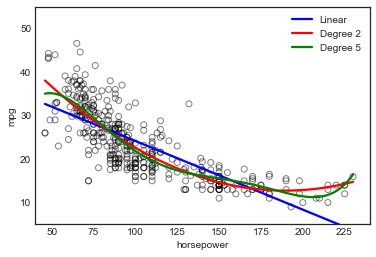

In [16]:
# Degree 1 = linear
# Degree 2 = quadratic
# Degree 3 = cubic
# Degree 4 = quartic
# Degree 5 = quintic

auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna() #drop NA values
auto.info()
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='b')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='r')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

The linear regression model assumes a linear relationship between the response and predictors. But in some cases, the true relationship between the response and the predictors may be nonlinear. We can directly extend the linear model to accommodate non-linear relationships by using polynomial regression.

We can transform the model (which still remains a linear model in X): 

$$  mpg=\beta_0+\beta_1 \times horsepower + \beta_2 \times horsepower^2 $$

We can still use standard linear regression software to estimate $\beta_0$, $\beta_1$, and $\beta_2$ in order to produce a non-linear fit.

To do so make another column to store the $horsepower^2$ values (quadratic):
```
auto['horsepower2'] = auto.horsepower**2
auto.head(3)
```

- Create residual plots for linear fit and quadratic fit

- Then run the statsmodels ols module as before to compare the linear and quadratic fit.

In [17]:
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [18]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


In [19]:
# User scikit-learn to fit a regression line

reg = skl_lm.LinearRegression()

# Linear fit using predictor ('horsepower') and response ('mpg')
X = auto.horsepower.values.reshape(-1,1)
Y = auto.mpg
reg.fit(X, Y)

# Predict using the linear model
auto['pred1'] = reg.predict(X)

# Compute the residual (actual-prediction)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit using horsepower and horsepower2
X2 = auto[['horsepower', 'horsepower2']].values.reshape(-1,2)
reg.fit(X2, Y)

# Predict using the quadratic model
auto['pred2'] = reg.predict(X2)

# Compute the residuals (actual-prediction)
auto['resid2'] = auto.mpg - auto.pred2

In [20]:
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2,pred1,resid1,pred2,resid2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0,19.416046,-1.416046,17.091508,0.908492
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0,13.891480,1.108520,13.480156,1.519844
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0,16.259151,1.740849,14.658717,3.341283


### <p style="color:red;">Task 5 (Question 3): 2%</p>

1. Which model is better? linear or quadratic (or higher degree)? How do you make the judgement?

Text(0.5, 1.0, 'Residual Plot for Quadratic Fit')

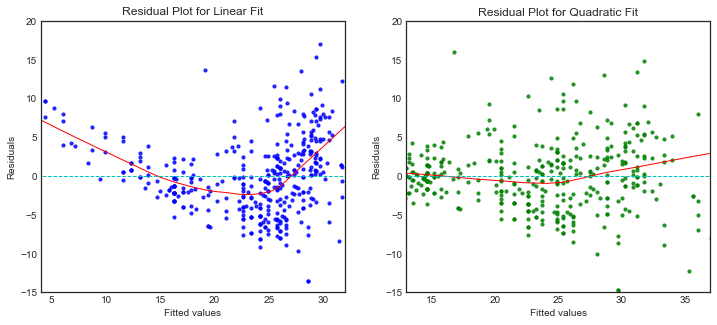

In [21]:
# compute the residual plots for linear fit and quadratic fit here
plt.subplots(figsize = (12,5))
plt.subplot(1,2,1)
sns.regplot(auto['pred1'], auto['resid1'], ci = None, lowess = True, scatter_kws = {'color':'b', 's':10}, color = 'r', line_kws = {"linewidth": 1})
sns.regplot(auto['pred1'], auto['resid1'], ci = None, scatter = False, color = 'c', line_kws = {"linewidth": 1, "linestyle": '--'})
plt.xlim(4,32);
plt.ylim(-15,20)
plt.xlabel('Fitted values', fontsize = 10)
plt.ylabel('Residuals', fontsize = 10)
plt.title('Residual Plot for Linear Fit')

plt.subplot(1,2,2)
sns.regplot(auto['pred2'], auto['resid2'], ci = None, lowess = True, scatter_kws = {'color':'g', 's':10}, color = 'r', line_kws = {"linewidth": 1})
sns.regplot(auto['pred2'], auto['resid2'], ci = None, scatter = False, color = 'c', line_kws = {"linewidth": 1, "linestyle": '--'})
plt.xlim(13,37);
plt.ylim(-15,20)
plt.xlabel('Fitted values', fontsize = 10)
plt.ylabel('Residuals', fontsize = 10)
plt.title('Residual Plot for Quadratic Fit')

In [23]:
# run the statsmodels ols module as before to compare the linear and quadratic fit here
est = smf.ols('mpg ~ horsepower', auto).fit()
print("Horsepower as predictor\n", est.summary().tables[0])

est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
print("Horsepower and Horsepower2 as predictor\n", est.summary().tables[0])

Horsepower as predictor
                             OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        14:08:24   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
Horsepower and Horsepower2 as predictor
                             OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:               

In [24]:
est = smf.ols('mpg ~ horsepower', auto).fit()
print(est.summary().tables[1])

est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      0.000      53.360      60.440
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001
